**BUSINESS UNDERSTANDING**

**Title: Telecommunication Customer Churn Analysis and Prediction**


Description

This project aims to build a classification model to predict customer churn for a telecommunication company. In this context, churn is used to describe a situation where a client ceases to take the products or services that are offered by the company. The work entails analyzing churn drivers, developing strong data-driven models to predict churn, and investing in information that can help the telecommunication firm increase customer loyalty. The project involves the use of structured data with machine learning and three datasets for training, validating, and testing the models.


**Introduction:**

In the telecommunication industry, customer retention remains a core factor in determining business success since it is expensive to acquire new customers. During the past several years, machine learning turned into a refined strategy for brands to analyze customer activity and make managerial decisions based on it.

This project will focus on classifying customers with likely hood of churning off the telecommunication firm and help the firm combat some of the leading causes of customer attrition. This will in turn allow the company to identify potential customers to retain, and design means of how to do this hence increasing the company’s revenue margins.

**Business Understanding**

The project starts with a strong foundation in business understanding, guided by the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology. The key objectives are as follows:

**Business Objectives:**

1. The first aim focuses on the determination of clients most likely to defect and the assessment of the drivers of their behavior.
This understanding enables the company to put measures aimed at increasing retention rate rather than customers churning over to other service-providing companies.
Also, the company also tries to calculate the total value of every customer, which will provide an understanding of which customer bases are valuable in the future.
Assess the Situation:

2. It includes three data options from which customer data records containing attributes such as customer description, subscription description, and usage frequencies can be obtained. Some of the resources include SQL server databases or cloud-hosted datasets – analysis tools like  Jupyter notebook, Power BI, tableau, etc..
All these make it imperative for the company to predict churn since it also faces other challenges such as competition, market saturation, and fluctuating customer expectations.
Data Mining Goals:

3. Create a sound predictive model selecting different techniques of the machine learning algorithms like Logistic Regression, Decision Trees, Support Vector Machines, Random Forest, and so on. Enhance feature space and understand the data better to find the most significant predictors of churn.
Get a good measure of model accuracy and precision in terms of customer churn in the test dataset used in an accurate model of the final one.
Produce Project Plan:

4. Data Collection and Understanding: Gather data from the database and GitHub repository and OneDrive.
Data Preprocessing: There also missing values and quality issues, and create new features from the existing ones.
Model Building: Use any kind of machine learning to train different models and then test them.
Model Evaluation and Interpretation: To come up with the model results, we are required to use LIME and SHAP to explain the results came up with in business.
Reporting and Visualization: Use graphs and charts to make presentations that will help share outcomes with the interested parties.

**Data Overview:**
The dataset for this project is divided into three parts:

First Data Set:

Contains 3000 records, accessible through a remote SQL Server database.
Features include customer demographics, subscription type, monthly charges, tenure, and whether the customer churned.
Second Data Set:

Contains 2000 records hosted on a GitHub repository as a CSV file.
It extends the first dataset with additional records for model training and evaluation.
Testing Data Set:

Contains 2000 records stored in a OneDrive file in Excel format.
This data is reserved for testing the final model’s accuracy and evaluating its performance in real-world scenarios.


**Data Analysis and Preprocessing:**


To ensure the data is ready for modeling, the following preprocessing steps will be performed:

Missing Value Computations: Data gaps should be recognized and filled properly to keep data accurate.

Data Cleaning: This means eliminating repetition, bringing order to disorder and unstructured data, and providing correction to the data.

Feature Engineering: New characteristics have to be developed (e.g., customer lifetime value, average monthly spending) to enhance the predictive realism of the model.

Normalization: Normalize numerical data so they will have the same scale for all features to improve model outcomes.

Handling Categorical Variables: Categorical variables can be transformed into numerical forms firstly by applying an encoding technique of one hot encoding or label encoding.

**Hypothesis**



-  **A hypothesis is an assumption you aim to validate using the data.** 

Here is my assumptions:


Null Hypothesis (H₀): There is no significant difference in churn rates between customers with month-to-month contracts and those with longer-term contracts.

Alternative Hypothesis (Ha): Customers with month-to-month contracts have a significantly higher churn rate compared to those with longer-term contracts.

**Business questions to Explore**

1. What are the key factors (features) that influence customer churn?
2. How does tenure (the length of time a customer has been with the company) relate to churn?
3. Is there a correlation between higher monthly charges and customer churn?
4. Does the contract type (month-to-month vs. long-term contracts) influence churn?
5. Are customers who use multiple services (bundled services like internet and phone) less likely to churn?


**Exploratory Data Analysis (EDA):**


During the EDA phase, the focus will be on uncovering trends and relationships within the data:

Descriptive Statistics: It is also important to provide summary descriptions of some other attributes, above all the age, tenure, monthly charges, as well as churn rates.
Correlation Analysis: Crossover correlation or analysis of correlation coefficients between features and churn to produce correlation matrices and heatmaps.
Visualizations: Display distributions and relationships using bar charts, histograms, and scatter plots, wherever necessary.
Customer Segmentation: Determine sophisticated categories of customers with respect to the profile and service usage to define potent risks.


**Issues Identified and Resolution Plan**

    
Missing Data: Impute missing values using mean, median, or mode based on data type.
Imbalanced Data: Apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.
Outliers: Use interquartile ranges to identify and handle outliers that could skew the model.
Feature Scaling: Normalize data using standard scaling methods to improve model convergence.
Categorical Variables: Encode categorical data using appropriate encoding techniques to ensure compatibility with machine learning models.

**Conclusion:**


At the end of this project the following shall be achieved: Develop a comprehensive classification model that would give a high accuracy of customer churn. Since the model will provide the necessary insights regarding the causal factors of churn, the telecommunication company can implement a suitable retention strategy. This project will also help to build data analysis and machine learning as well as model interpretation skills, which remain useful for the company and the analyst.


**Importing necessary libraries**

In [1]:
# importing necessary libraries

import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV,
    StratifiedKFold
)

from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score, 
    roc_auc_score, 
    classification_report, 
    confusion_matrix,
    roc_auc_score
)

warnings.filterwarnings('ignore')

**Data Collection**

**Create a Connection and loading the files**


In [2]:
#import sqlalchemy 

import  sqlalchemy as sa

import pyodbc

conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=dap-projects-database.database.windows.net;'
    'DATABASE=dapDB;'
    'UID=LP2_project;'
    'PWD=Stat$AndD@t@Rul3;'
)

query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_first = pd.read_sql(query, conn)
conn.close()


In [3]:
df_first.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [4]:
#saving first dataset into csv
df_first.to_csv('df_first.csv', index=False)

In [5]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [6]:
df_first.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [7]:
df_first.duplicated().sum()

0

In [8]:
df_first.shape

(3000, 21)

In [9]:
# Read the second file into a pandas dataframe

df_second = pd.read_csv(r"C:\Users\ADMIN\Downloads\LP2_Telco-churn-second-2000 (1).csv")

In [10]:
df_second.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [11]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [12]:
df_second.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df_second.duplicated().sum()

0

In [14]:
df_second.shape

(2043, 21)

In [15]:
#read xlsx file into pd dataframe

df_test =pd.read_excel(r"C:\Users\ADMIN\Downloads\Telco-churn-last-2000 (1).xlsx")

In [16]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [18]:
df_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [19]:
df_test.duplicated().sum()

0

In [20]:
df_test.shape

(2000, 20)

**Concatenate train data**

In [21]:
# concatenate date 1 and 2 

traindata =pd.concat([df_first,df_second], ignore_index =True)

In [22]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [23]:
#make a copy of the traindata set
traindata = traindata.copy()


In [24]:
traindata.copy

<bound method NDFrame.copy of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0    True      False       1   
1     5575-GNVDE    Male              0   False      False      34   
2     3668-QPYBK    Male              0   False      False       2   
3     7795-CFOCW    Male              0   False      False      45   
4     9237-HQITU  Female              0   False      False       2   
...          ...     ...            ...     ...        ...     ...   
5038  6840-RESVB    Male              0     Yes        Yes      24   
5039  2234-XADUH  Female              0     Yes        Yes      72   
5040  4801-JZAZL  Female              0     Yes        Yes      11   
5041  8361-LTMKD    Male              1     Yes         No       4   
5042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           False              None             DSL   

In [25]:
traindata.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [26]:
# convert the datatype TotalCharges from object to numeric

traindata['TotalCharges'] =pd.to_numeric(traindata['TotalCharges'], errors ='coerce')

df_test['TotalCharges'] =pd.to_numeric(df_test['TotalCharges'], errors ='coerce')

In [27]:
print(traindata['TotalCharges'].dtype)

print(df_test['TotalCharges'].dtype)

float64
float64


In [28]:
traindata.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [29]:
# Check unique values in each column

def unique_values(dataframe):
    
    unique_summary = []
    
    for column in dataframe.columns:
        values = dataframe[column].unique()
        count_values = len(values)
        
        unique_summary.append({
            "Column": column,
            "Unique_values": values,
            "Count_of_unique_values": count_values
        })
        
    usummary = pd.DataFrame(unique_summary)
    
    return usummary

In [30]:
unique_values(traindata)

,Column,Unique_values,Count_of_unique_values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",5043
1,gender,"[Female, Male]",2
2,SeniorCitizen,"[0, 1]",2
3,Partner,"[True, False, No, Yes]",4
4,Dependents,"[False, True, No, Yes]",4
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
6,PhoneService,"[False, True, Yes, No]",4
7,MultipleLines,"[None, False, True, No, No phone service, Yes]",6
8,InternetService,"[DSL, Fiber optic, No]",3
9,OnlineSecurity,"[False, True, None, No, Yes, No internet service]",6


In [31]:
# drop customer id column.

traindata.drop(columns ="customerID", inplace=True)
df_test.drop(columns ="customerID", inplace =True)

In [32]:
traindata.head(3)


df_test.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55


In [33]:
# convert to Yes and No

labels= traindata.select_dtypes(include ='object'). columns.tolist()

labels

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [34]:
# convert to string
traindata[labels] =traindata[labels].astype(str)

In [35]:
# add a function to make necessary changes

binary ={ 
    "No" : ["False", "0", "No phone service", "No internet service"],
    "Yes" : ["Yes", "1"]
}


def correct_columns(traindata, labels, binary):
    for columns_name in labels:
        for key, values in binary.items():
            traindata[columns_name] = traindata[columns_name].replace(values, key)
    return traindata

# Apply the function
traindata = correct_columns(traindata, labels, binary)


In [36]:
# verifying

print(traindata.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0    True         No       1           No   
1    Male              0      No         No      34         True   
2    Male              0      No         No       2         True   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2         True   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0          None             DSL             No         True               No   
1            No             DSL           True           No             True   
2            No             DSL           True         True               No   
3          None             DSL           True           No             True   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No       

In [37]:
# create a list for numerical values

numbers =traindata[["tenure", "MonthlyCharges", "TotalCharges"]]
numbers

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.850000
1,34,56.950001,1889.500000
2,2,53.849998,108.150002
3,45,42.299999,1840.750000
4,2,70.699997,151.649994
...,...,...,...
5038,24,84.800000,1990.500000
5039,72,103.200000,7362.900000
5040,11,29.600000,346.450000
5041,4,74.400000,306.600000


**Imputing the missing values**

In [38]:
# Impute numerical column 'TotalCharges' with the median
traindata['TotalCharges'].fillna(traindata['TotalCharges'].median(), inplace=True) 

In [39]:
# select the categorical columns with missing values

# Imputing categorical columns with  mode
categorical_columns =['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 
                           'StreamingMovies', 'Churn']         
for col in categorical_columns:    
            
            traindata[col].replace("", np.nan, inplace=True)  
            traindata[col].replace("NaN", np.nan, inplace=True)  
            traindata[col].replace("nan", np.nan, inplace=True)
            traindata[col].fillna(traindata[col].mode()[0],inplace=True)
            traindata[col].replace('None', np.nan, inplace=True)
    
    

In [40]:
#verifying

for col in traindata.columns:
    print(f"Unique values in '{col}': {traindata[col].unique()}")


Unique values in 'gender': ['Female' 'Male']
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': ['True' 'No' 'Yes']
Unique values in 'Dependents': ['No' 'True' 'Yes']
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': ['No' 'True' 'Yes']
Unique values in 'MultipleLines': [nan 'No' 'True' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'True' nan 'Yes']
Unique values in 'OnlineBackup': ['True' 'No' nan 'Yes']
Unique values in 'DeviceProtection': ['No' 'True' nan 'Yes']
Unique values in 'TechSupport': ['No' 'True' nan 'Yes']
Unique values in 'StreamingTV': ['No' 'True' nan 'Yes']
Unique values in 'StreamingMovies': ['No' 'True' nan 'Yes']
Unique values in 'Contract': ['Month-to-mo

In [41]:
# Replace all 'None' with NaN in the specified categorical columns
for col in categorical_columns:
    traindata[col].replace(['None', 'none', 'NONE'], np.nan, inplace=True)
    traindata[col].replace(['True'], np.nan, inplace=True)

# Drop rows where any of the specified columns contain NaN
traindata.dropna(subset=categorical_columns, inplace=True)

# Verifying
for col in traindata.columns:
    print(f"Unique values in '{col}': {traindata[col].unique()}")



Unique values in 'gender': ['Male' 'Female']
Unique values in 'SeniorCitizen': [1 0]
Unique values in 'Partner': ['No' 'True' 'Yes']
Unique values in 'Dependents': ['No' 'True' 'Yes']
Unique values in 'tenure': [ 1  2 44 20  5 17 48  7 11  9 24 10 12  4 37 50 14  3 18  8 15 27 22  6
 16 46 19 13 55 69 64 39 25 66 61 43 23 71 34 41 72 35 54 56 68 53 30 36
 21 33 49 42 67 40 45 57 65 28 52 47 29 62 26 60 51 70 59 38  0 58 31 32
 63]
Unique values in 'PhoneService': ['True' 'Yes' 'No']
Unique values in 'MultipleLines': ['No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes']
Unique values in 'OnlineBackup': ['No' 'Yes']
Unique values in 'DeviceProtection': ['No' 'Yes']
Unique values in 'TechSupport': ['No' 'Yes']
Unique values in 'StreamingTV': ['No' 'Yes']
Unique values in 'StreamingMovies': ['No' 'Yes']
Unique values in 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in 'PaperlessBilling': ['No' 'True'

In [42]:
traindata.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
34,Male,1,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.250000,45.250000,No
162,Female,0,No,No,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,69.699997,135.199997,No
181,Female,0,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.299999,45.299999,No


In [43]:
#confirming if we have any missing values
traindata.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Univariate Analysis**

In [44]:
traindata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,2118.000000,2118.000000,2118.000000,2118.000000
mean,0.169972,31.858357,64.460741,2242.920892
std,0.375697,24.423011,29.560280,2247.447888
min,0.000000,0.000000,18.550000,18.850000
25%,0.000000,8.000000,39.912500,397.387500
50%,0.000000,28.000000,69.950000,1346.400000
75%,0.000000,54.000000,89.300000,3765.912500
max,1.000000,72.000000,118.350000,8670.100000


In [45]:
# Change the data type of the 'SeniorCitizen' column from int to str
traindata['SeniorCitizen'] = traindata['SeniorCitizen'].astype(str)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Calculate and print statistical analysis for each column in 'numbers'
for col in numbers.columns:

    
    skewness = round(numbers[col].skew(),2)
    kurtosis = round(numbers[col].kurtosis(),2)
    mean = round(numbers[col].mean(),2)
    median = round(numbers[col].median(),2)
    
    # Print the statistics for each column
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print("-" * 30)


Column: tenure
Skewness: 0.23
Kurtosis: -1.39
Mean: 32.58
Median: 29.0
------------------------------
Column: MonthlyCharges
Skewness: -0.24
Kurtosis: -1.25
Mean: 65.09
Median: 70.55
------------------------------
Column: TotalCharges
Skewness: 0.94
Kurtosis: -0.28
Mean: 2302.06
Median: 1401.15
------------------------------


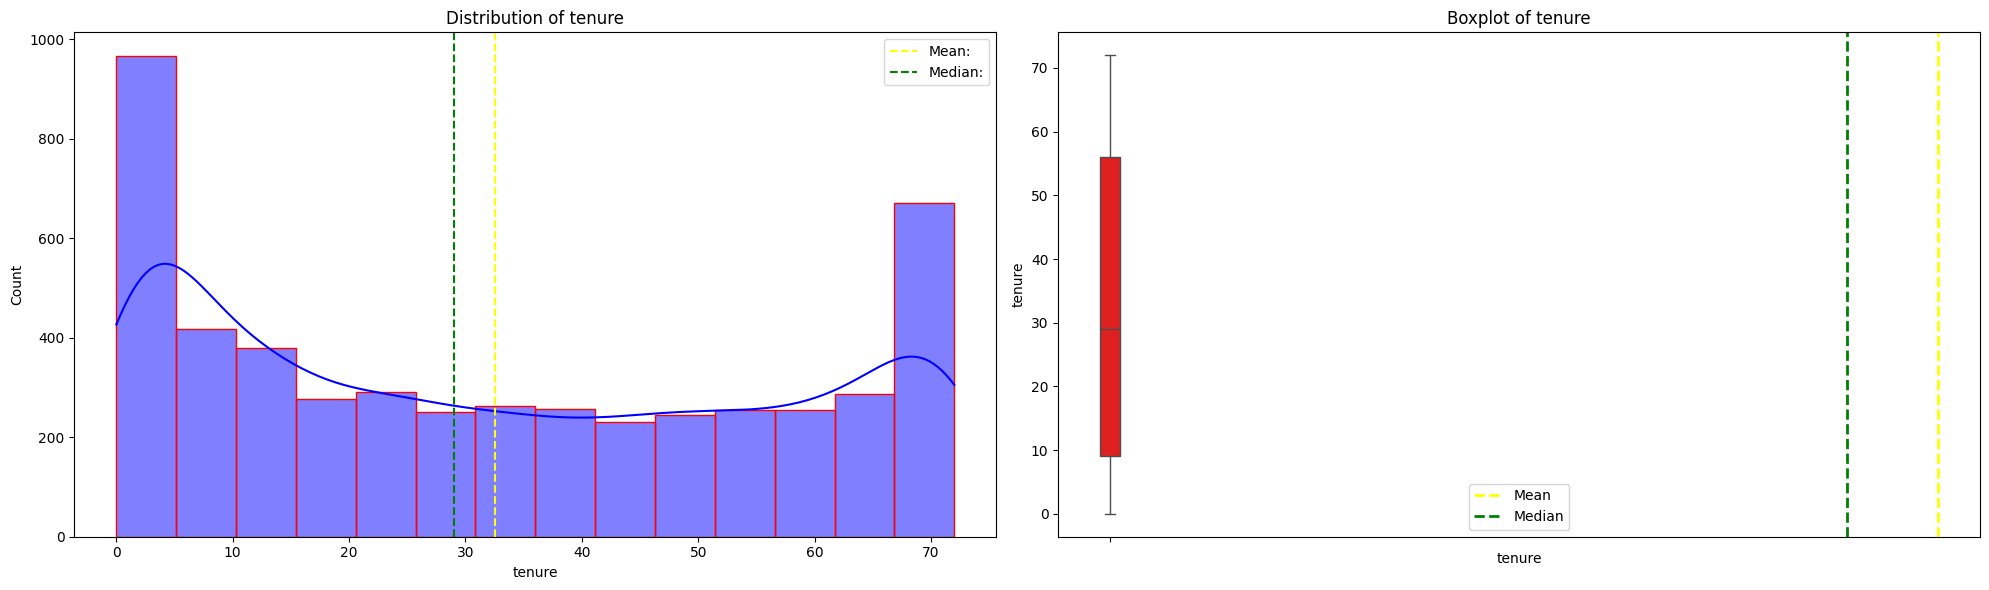

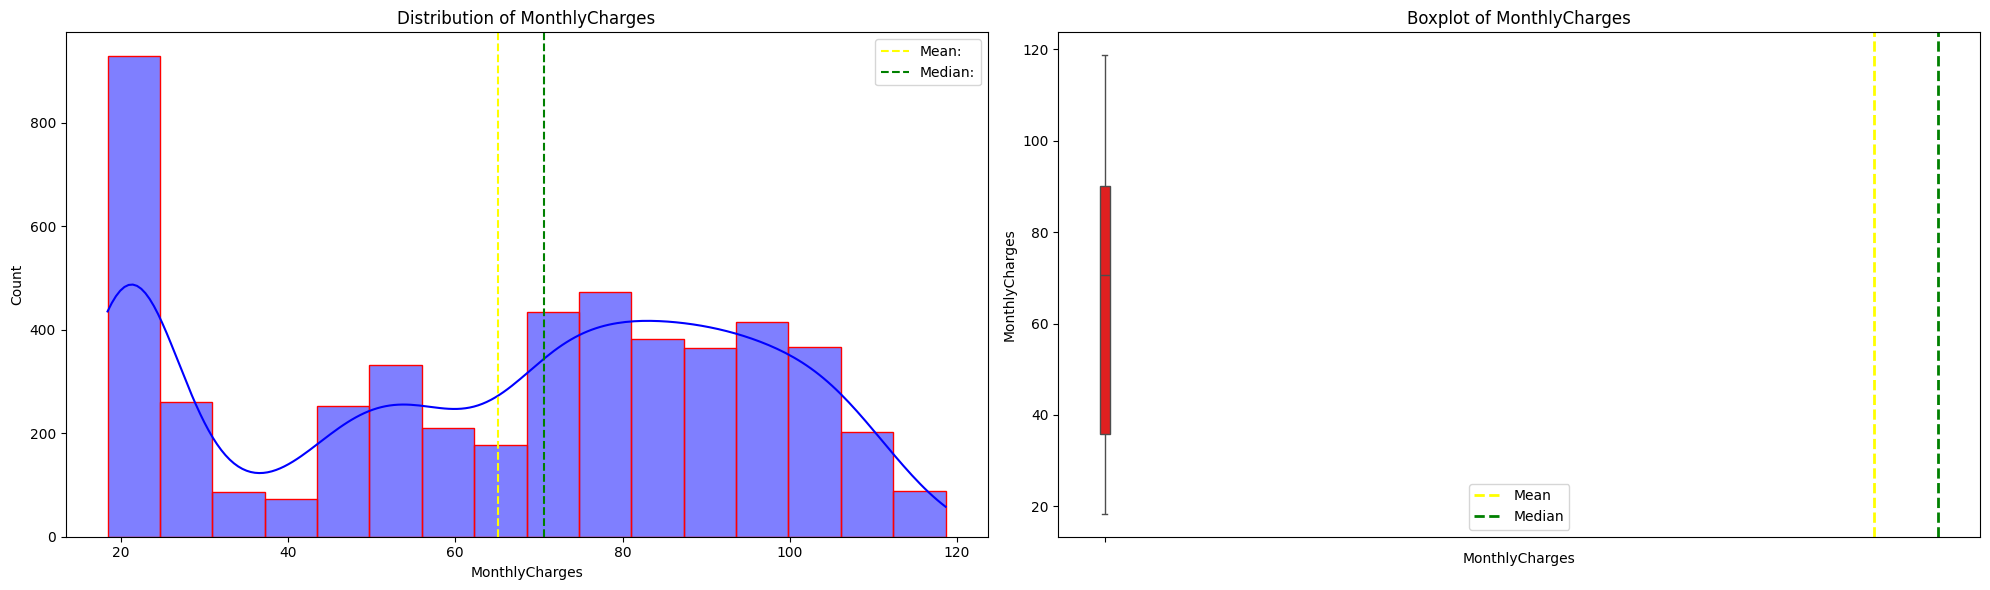

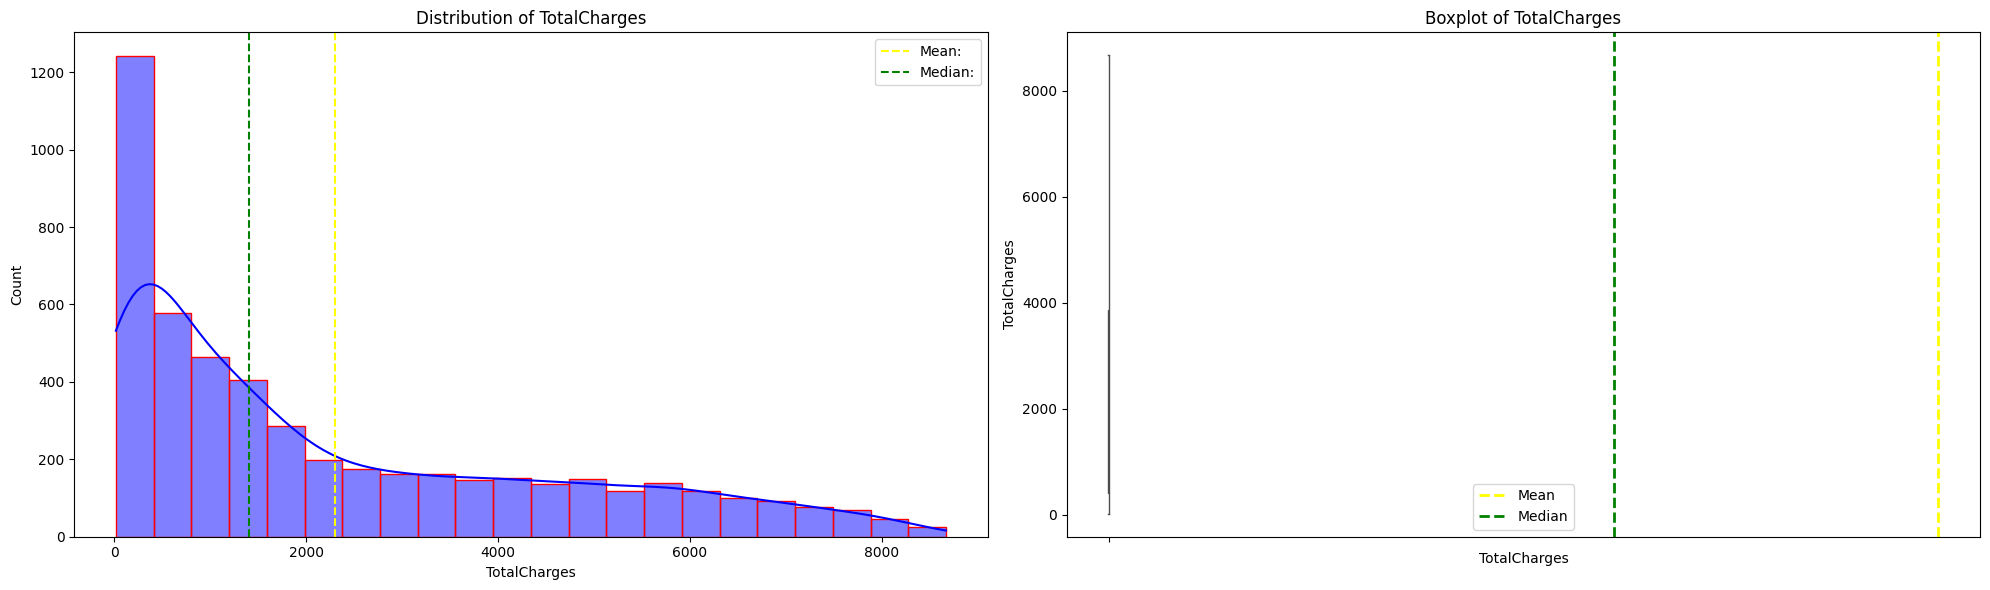

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns you want to visualize
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Loop through each column to create plots
for col in numerical_columns:
    # Calculate mean and median for the column
    mean = numbers[col].mean()
    median = numbers[col].median()

    # Set plot size
    plt.figure(figsize=(20, 6))

    # Adding histplot
    plt.subplot(1, 2, 1)
    sns.histplot(numbers[col], kde=True, color='Blue', edgecolor='red')
    plt.axvline(mean, color='yellow', linestyle='dashed', label=f'Mean:')
    plt.axvline(median, color='green', linestyle='dashed', label=f'Median:')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()

    # Adding boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=numbers[col], color='red')
    plt.axvline(mean, color='yellow', linestyle='dashed', label='Mean', linewidth=2)
    plt.axvline(median, color='green', linestyle='dashed', label='Median', linewidth=2)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.legend()

    # Show the plot for the current column
    plt.tight_layout()
    plt.show()


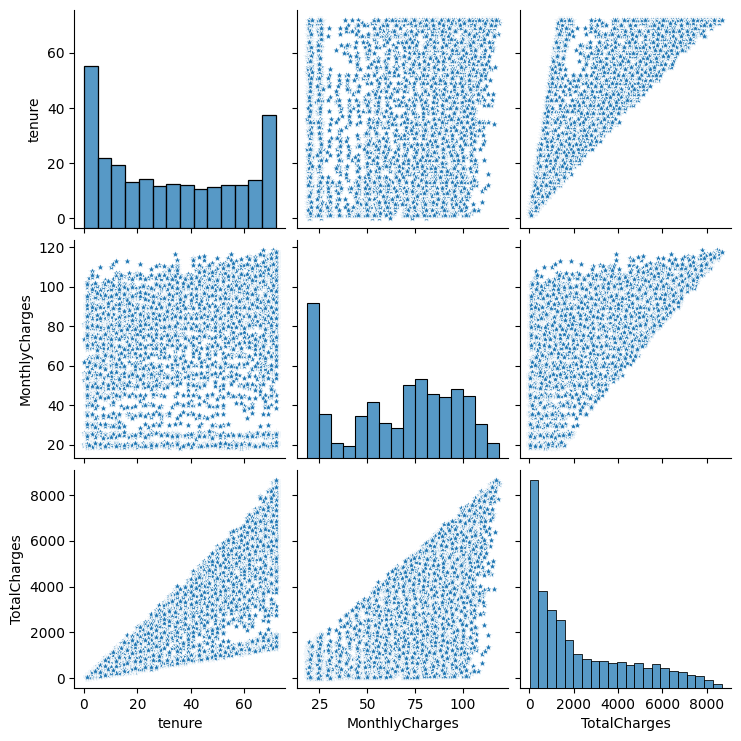

In [49]:
sns.pairplot(numbers,markers ='*',palette='viridis')

In [50]:
#for categorical features

In [51]:
def visual_category(traindata, column):
    fig, axes = plt.subplots(2, len(column), figsize = (10,15))

    for i, column in enumerate(column):

        # Countplot
        count_ax = sns.countplot(x = traindata[column], ax = axes[0,i], color = 'blue')
        axes[0,i].set_title(f"Countplot of {column}")

        # add labels
        total = len(traindata)
        for container in count_ax.containers:
            label = [f'{h.get_height() / total*100:.2f}%' if h.get_height() > 0 else '' for h in container]
            count_ax.bar_label(container, label)

        # Boxplot
        sns.boxplot(traindata[column], ax = axes[1,i], color = 'red')
        axes[1,i].set_title(f"Boxplot of {column}")

        # Add labels for mode
        freq = traindata[column].mode()[0]
        axes[1,i].text(0.05,freq, f"Mode:{freq}", color = 'black', va = 'center')

        
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

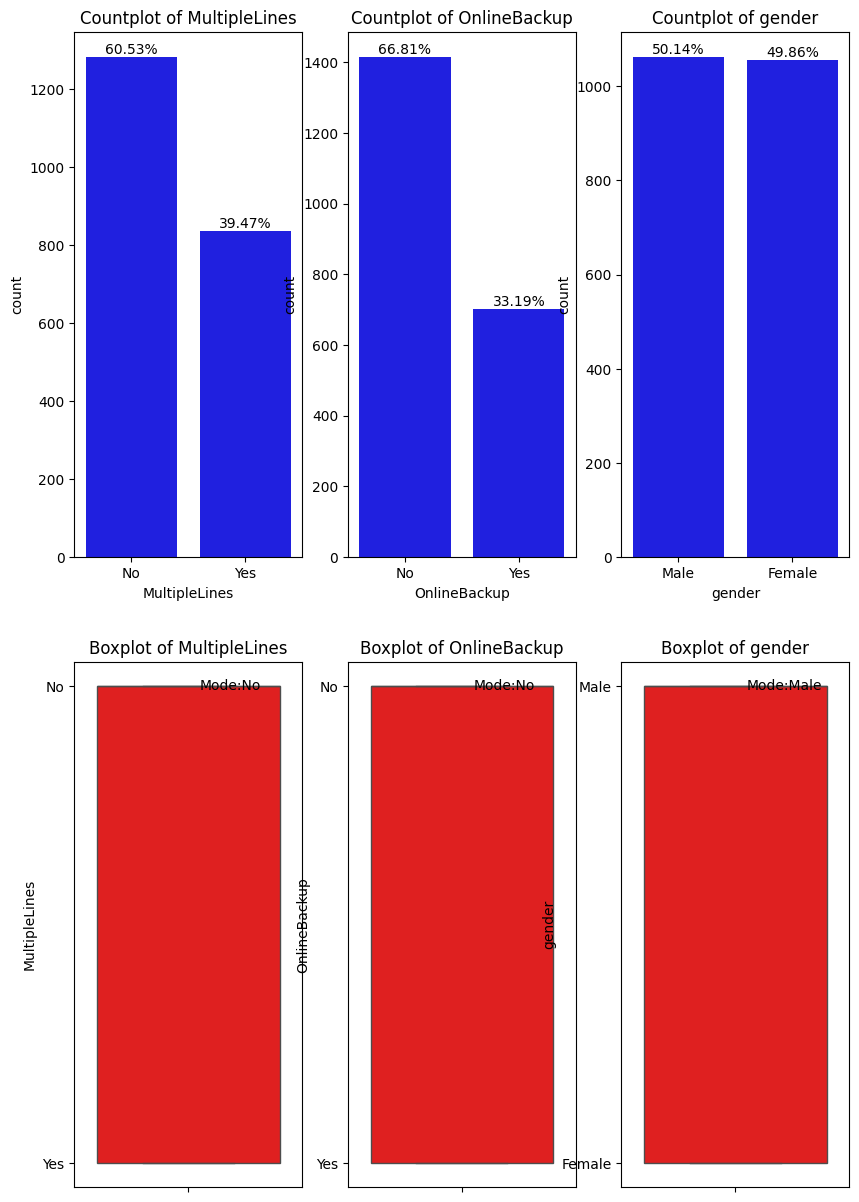

In [52]:
visual_category(traindata,['MultipleLines', 'OnlineBackup','gender'])

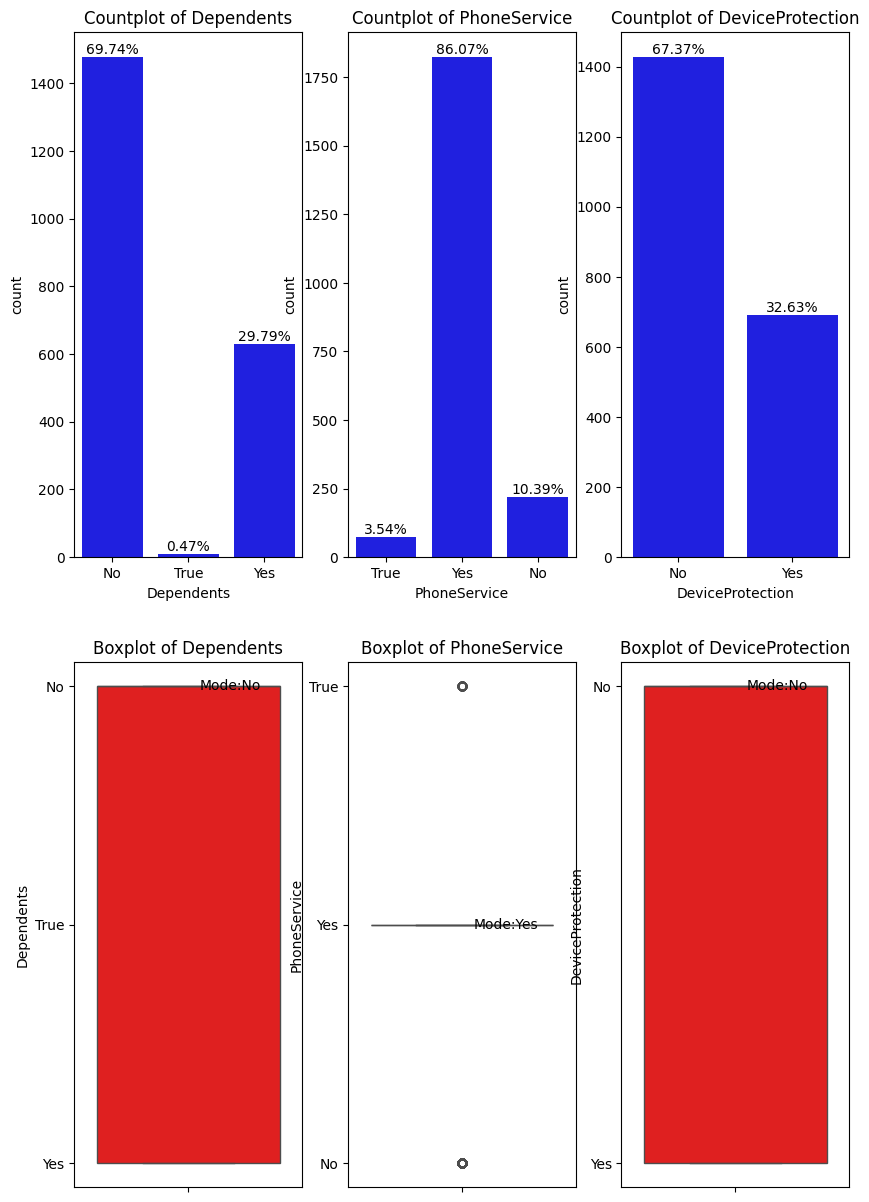

In [53]:
visual_category(traindata,['Dependents', 'PhoneService','DeviceProtection'])

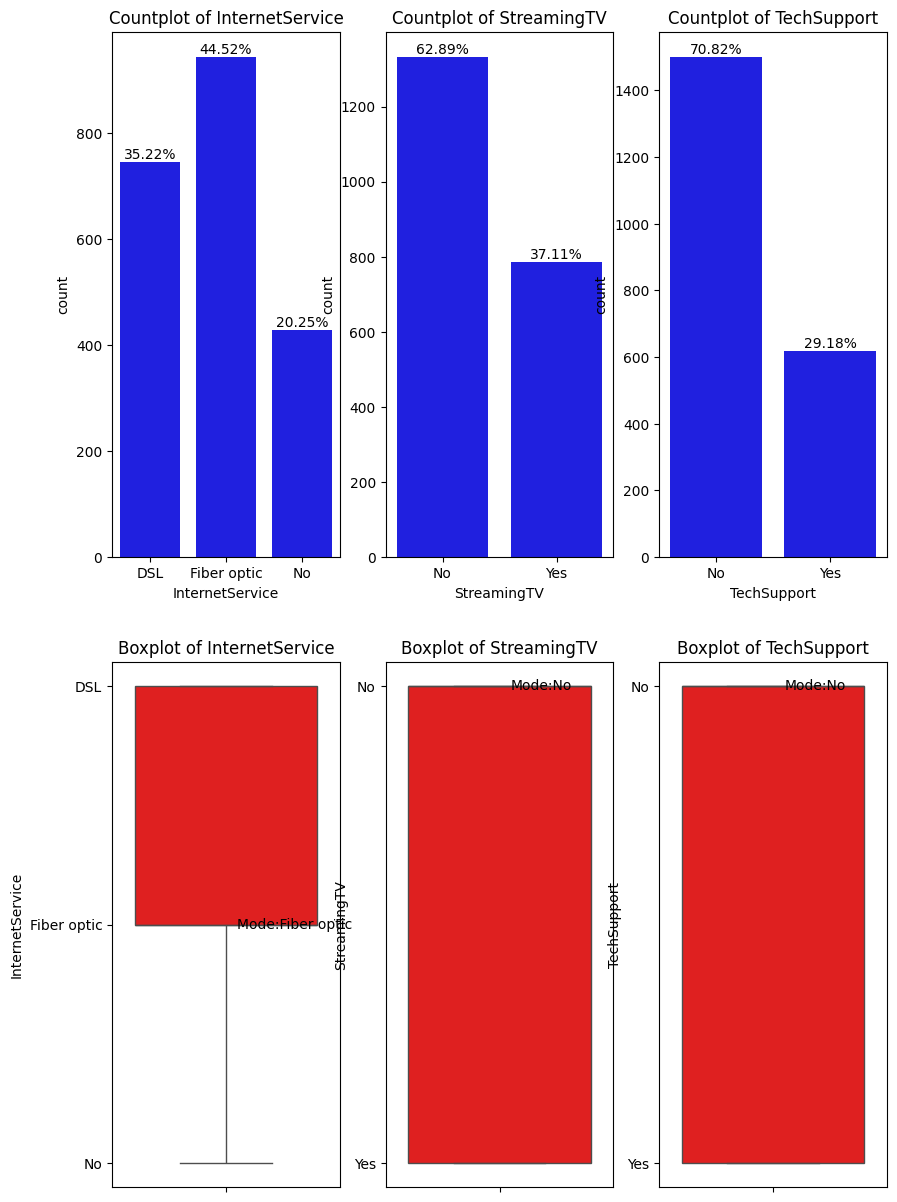

In [54]:
visual_category(traindata,['InternetService', 'StreamingTV','TechSupport'])

**Bivariate analysis**

In [55]:
all=["gender", "Partner", "SeniorCitizen", "Dependents", "PhoneService", "MultipleLines", 
        "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", 
        "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

In [56]:
len(all)

16

In [57]:
print(traindata.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [58]:
import math

def category_vs_target(data, all, target):
    n_rows = math.ceil(len(all) / 3)

    fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))
    axes = axes.flatten()

    for i, column in enumerate(all):
        ax = axes[i]
        
        sns.countplot(data=data, x=column, hue=target, ax=ax)
        
        ax.set_xlabel(column)
        ax.set_ylabel("count")
        ax.set_title(f"{column} vs {target}")
        ax.set_xticks(ax.get_xticks())

        ax.legend(title="churn status", loc='upper left')

    plt.tight_layout()
    plt.show()


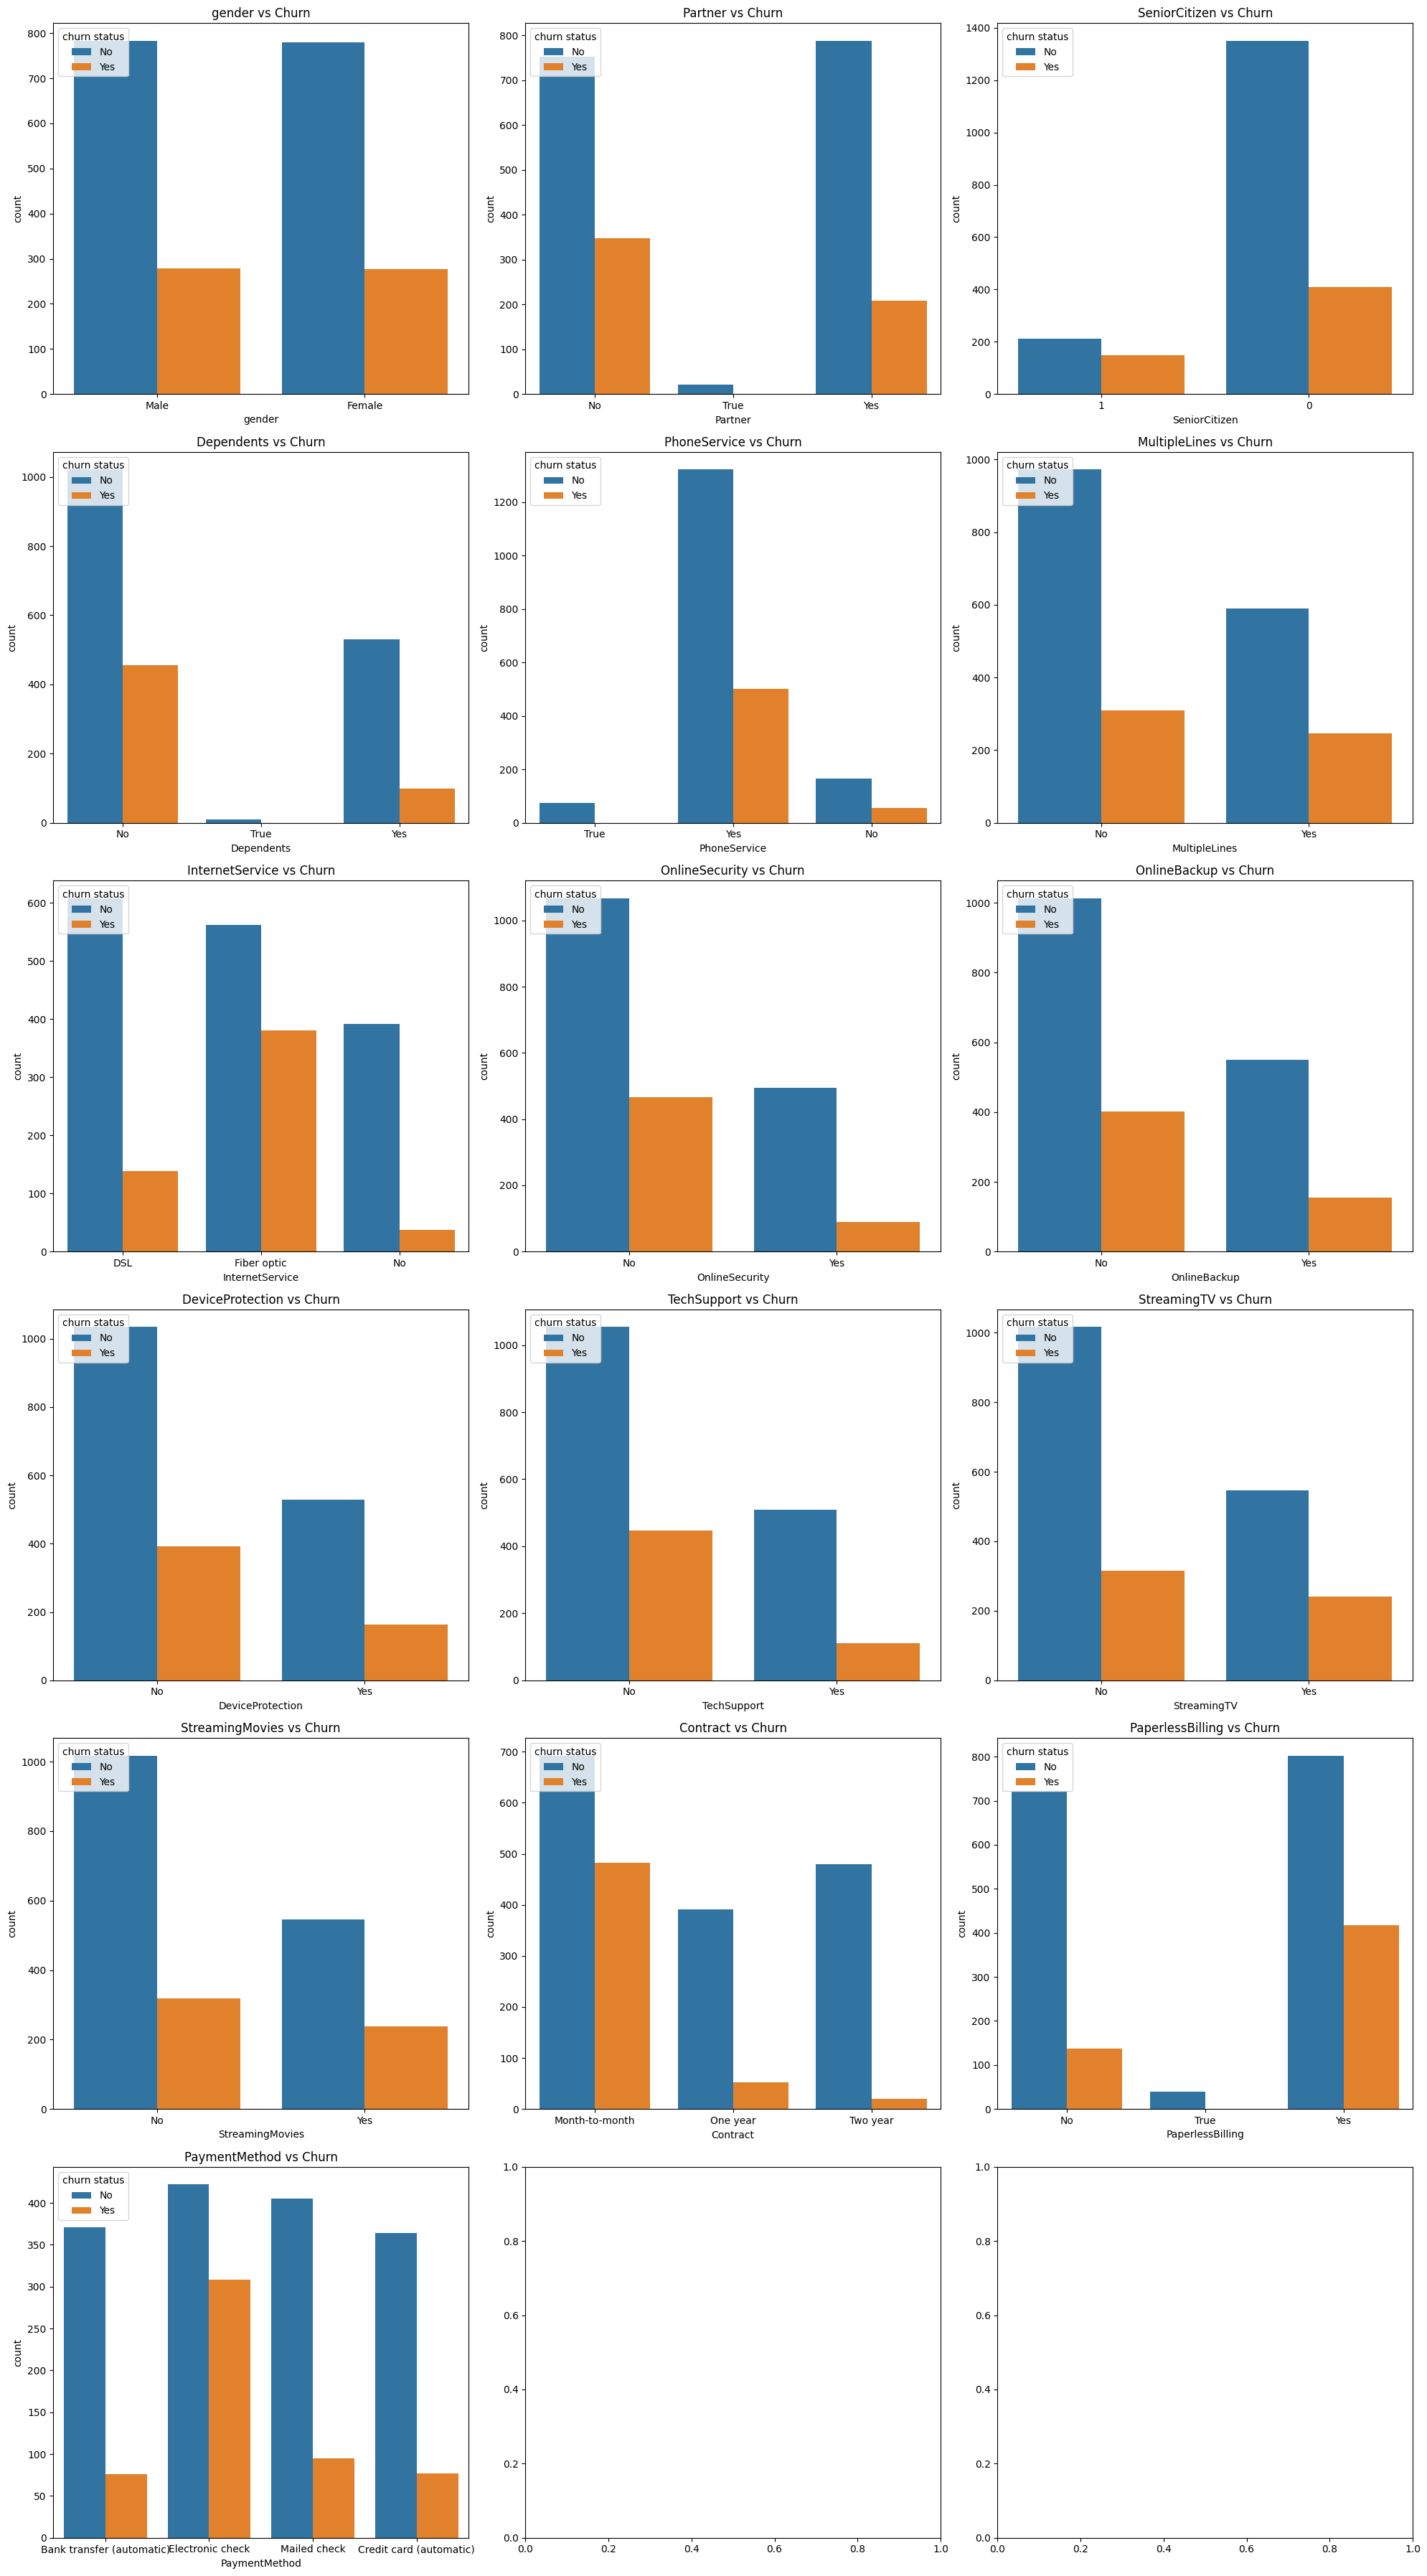

In [59]:
category_vs_target(traindata, all,'Churn')

**Observations from the visuals**

**Multivariate Analysis**

In [60]:
correlation =numbers.corr()
correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.240645,0.826264
MonthlyCharges,0.240645,1.000000,0.647007
TotalCharges,0.826264,0.647007,1.000000


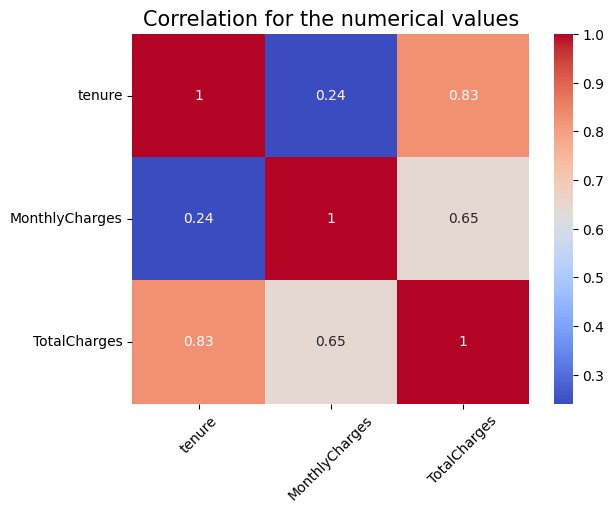

In [61]:
# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Add title and adjust font size
plt.title('Correlation for the numerical values', fontsize=15)

# Adjust x and y axis labels rotation
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


**Hypothesis**

**Null Hypothesis (H0):**  
There is no significant difference in churn rates between customers with month-to-month contracts and those with longer-term contracts (one-year or two-year contracts).

**Alternative Hypothesis (Ha):**  
Customers with month-to-month contracts have a significantly higher churn rate compared to those with longer-term contracts.


In [62]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for Contract types and Churn status
contingency_table = pd.crosstab(traindata['Contract'], traindata['Churn'])

# Perform the Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

# Decision making based on p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis (H₀): There is a significant difference in churn rates between contract types.")
else:
    print("Fail to reject the null hypothesis (H₀): No significant difference in churn rates between contract types.")


Chi-square test statistic: 308.44858079396346
p-value: 1.0501267105672813e-67
Degrees of freedom: 2
Reject the null hypothesis (H₀): There is a significant difference in churn rates between contract types.


**Business questions to Explore**

1. How does the churn rate vary based on the customers' gender?
2. How does tenure (the length of time a customer has been with the company) relate to churn?
3. Is there a correlation between higher monthly charges and customer churn?
4. Does the contract type (month-to-month vs. long-term contracts) influence churn?
5. Are customers who use multiple services (bundled services like internet and phone) less likely to churn?


### Answering Business Questions

**What are the key factors (features) that influence customer churn?**


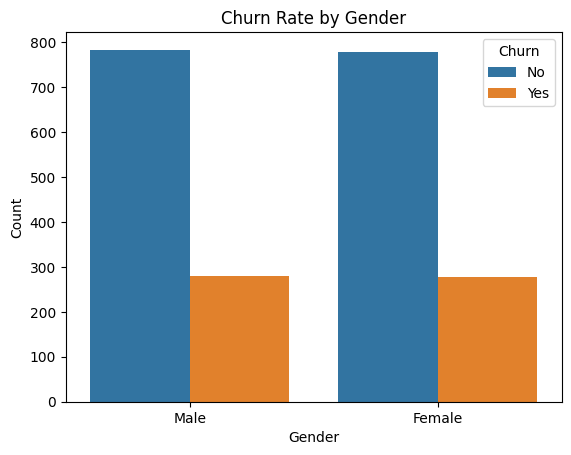

In [63]:
sns.countplot(data=traindata, x='gender', hue='Churn')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


**How does tenure (the length of time a customer has been with the company) relate to churn**


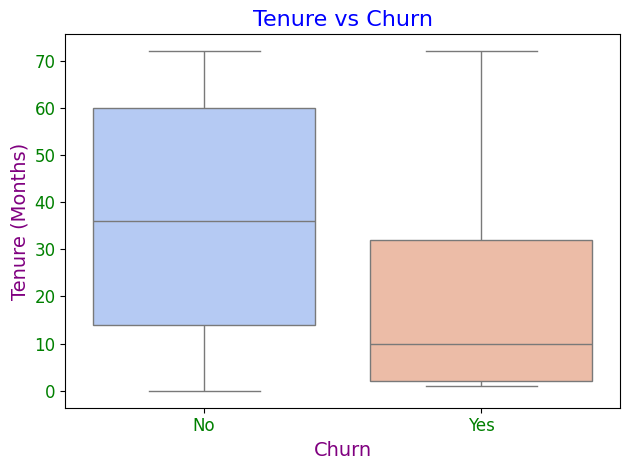

In [64]:
# Create a box plot to see the distribution of tenure for churned and non-churned customers
sns.boxplot(data=traindata, x='Churn', y='tenure', palette='coolwarm')
plt.title('Tenure vs Churn', fontsize=16, color='blue')
plt.xlabel('Churn', fontsize=14, color='purple')
plt.ylabel('Tenure (Months)', fontsize=14, color='purple')
plt.xticks(fontsize=12, color='green')
plt.yticks(fontsize=12, color='green')
plt.tight_layout()
plt.show()



**Is there a correlation between higher monthly charges and customer churn?**


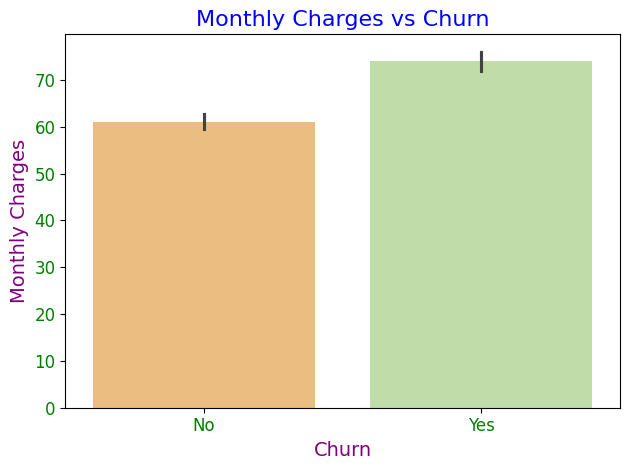

In [65]:
sns.barplot(data=traindata, x='Churn', y='MonthlyCharges', palette='Spectral')
plt.title('Monthly Charges vs Churn', fontsize=16, color='blue')
plt.xlabel('Churn', fontsize=14, color='purple')
plt.ylabel('Monthly Charges', fontsize=14, color='purple')
plt.xticks(fontsize=12, color='green')
plt.yticks(fontsize=12, color='green')
plt.tight_layout()
plt.show()



**Does the contract type (month-to-month vs. long-term contracts) influence churn?**

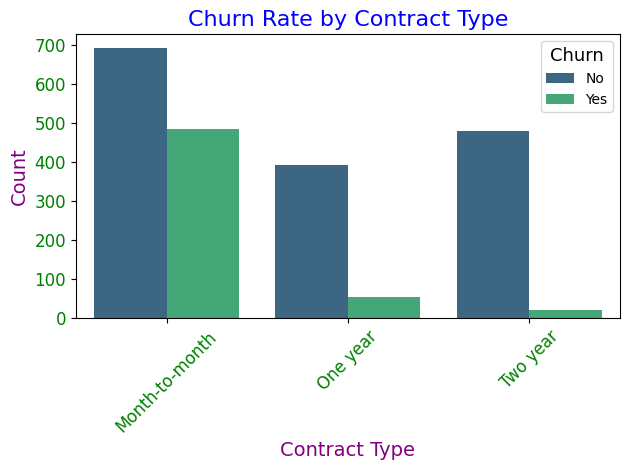

In [66]:
sns.countplot(data=traindata, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Rate by Contract Type', fontsize=16, color='blue')
plt.xlabel('Contract Type', fontsize=14, color='purple')
plt.ylabel('Count', fontsize=14, color='purple')
plt.xticks(rotation=45, fontsize=12, color='green')
plt.yticks(fontsize=12, color='green')
plt.legend(title='Churn', title_fontsize=13)
plt.tight_layout()
plt.show()



**Are customers who use multiplelines less likely to churn?**

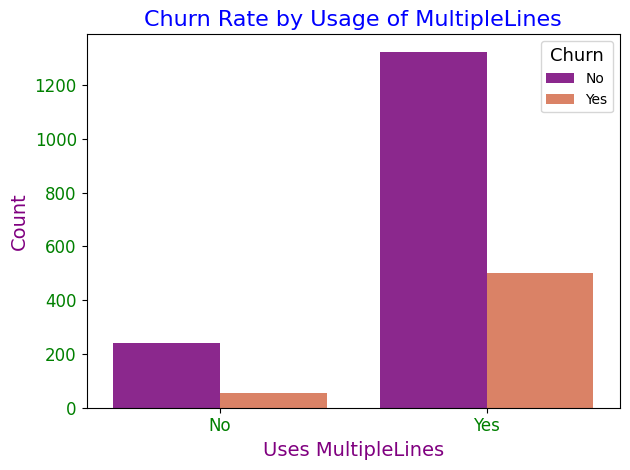

In [67]:
traindata['MultipleLines'] = traindata[['PhoneService', 'InternetService']].apply(lambda x: 'Yes' if 'Yes' in x.values else 'No', axis=1)

sns.countplot(data=traindata, x='MultipleLines', hue='Churn', palette='plasma')
plt.title('Churn Rate by Usage of MultipleLines', fontsize=16, color='blue')
plt.xlabel('Uses MultipleLines', fontsize=14, color='purple')
plt.ylabel('Count', fontsize=14, color='purple')
plt.xticks(rotation=0, fontsize=12, color='green')
plt.yticks(fontsize=12, color='green')
plt.legend(title='Churn', title_fontsize=13)
plt.tight_layout()
plt.show()


**Data Preparation**

In [68]:
traindata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
34,Male,1,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.250000,45.250000,No
162,Female,0,No,No,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,69.699997,135.199997,No
181,Female,0,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.299999,45.299999,No
204,Male,0,No,No,44,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),68.849998,2958.949951,No
286,Female,0,No,No,20,True,No,DSL,No,No,No,No,No,No,Month-to-month,True,Electronic check,44.349998,927.150024,No


In [69]:
# create a copy of the dataframe
train_mod =traindata.copy()
train_mod.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
34,Male,1,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.250000,45.250000,No
162,Female,0,No,No,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,69.699997,135.199997,No
181,Female,0,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.299999,45.299999,No
204,Male,0,No,No,44,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),68.849998,2958.949951,No
286,Female,0,No,No,20,True,No,DSL,No,No,No,No,No,No,Month-to-month,True,Electronic check,44.349998,927.150024,No


In [70]:
traindata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
34,Male,1,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.250000,45.250000,No
162,Female,0,No,No,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,69.699997,135.199997,No
181,Female,0,No,No,1,True,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.299999,45.299999,No
204,Male,0,No,No,44,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),68.849998,2958.949951,No
286,Female,0,No,No,20,True,No,DSL,No,No,No,No,No,No,Month-to-month,True,Electronic check,44.349998,927.150024,No


In [71]:
# check for imbalaced data in the target column, the churn column
traindata["Churn"].value_counts()

Churn
No     1562
Yes     556
Name: count, dtype: int64

In [72]:
# resampling

import pandas as pd
from sklearn.utils import resample


# Split data into majority and minority classes
churn_major = train_mod[train_mod['Churn'] == 'No']
churn_minor = train_mod[train_mod['Churn'] == 'Yes']

# Resample the minority class to match the majority class size
minor_resampled = resample(churn_minor, replace=True, n_samples=len(churn_major), random_state=42)

# Combine the resampled minority class with the majority class
train_model = pd.concat([churn_major, minor_resampled])

# Check the class distribution in the resampled dataset
print(train_model['Churn'].value_counts())

Churn
No     1562
Yes    1562
Name: count, dtype: int64


**Splitting The Train and Test into the X and y variables**

In [73]:
from sklearn.model_selection import train_test_split

# Split data into target and feature variables

# Feature variables
X = train_model.drop('Churn', axis=1)

# Target variable
y = train_model['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Label encode the values of the target column

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


In [74]:
#check the size of the traindata
(X_train.shape, y_train.shape), (X_train.shape, y_train.shape), (X_train.shape)

(((2499, 19), (2499,)), ((2499, 19), (2499,)), (2499, 19))

In [75]:
import pandas as pd

# Assuming you have a DataFrame named 'X'

# Separate numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

**Feature Scaling**

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the numerical and categorical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Example numerical columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('quantile_transform', QuantileTransformer(output_distribution='normal'))
])

# Preprocessing for categorical data including 'MultipleLines'
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, num_cols),
        ('categorical', categorical_transformer, cat_cols)
    ]
)

# Fit the preprocessor to X_train
preprocessor.fit(X_train)

# Display the preprocessor to verify its setup
preprocessor


ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('quantile_transform',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [77]:
## modeling and evaluation

In [78]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE

In [79]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

models = {
    'KNN': KNeighborsClassifier(n_neighbors=18),
    'LR': LogisticRegression(max_iter=1000, random_state=42, verbose=0),
    'RF': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None),
    'SVC': SVC(probability=True, random_state=42, C=1.0, gamma='scale'),
    'GB': GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3),
    'bagging_classifier': BaggingClassifier() 
}

# Define oversampling technique
sampler = SMOTE(random_state=42)

pipelines = []

for model_name, classifier in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler', sampler),
        ('model', classifier)
    ])

    pipelines.append((model_name, pipeline))

In [80]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

In [81]:
from sklearn.metrics import confusion_matrix


# Create a Dictionary to store evaluation for each model
model_eval = {}

# Loop through models, fit, and evaluate each model
for model_name, model_classifier in models.items():
    
    # Check if model is LightGBM and set verbosity to -1
    if model_name == 'LightGBM':
        model_classifier.set_params(verbosity = -1)
    
    # Fit the model on the processed training data
    model_classifier.fit(X_train_processed, y_train)
    
    # Predict on the processed test data
    y_pred = model_classifier.predict(X_val_processed)
    
    # Get the evaluation score for each metric
    F1_Score = f1_score(y_val, y_pred)
    Precision_Score = precision_score(y_val, y_pred)
    Recall_Score = recall_score(y_val, y_pred)
    Accuracy_Score = accuracy_score(y_val, y_pred)
    Confusion_Matrix = confusion_matrix(y_val, y_pred)
    Predictions = y_pred
    
    # Store the evaluation score for each model
    model_eval[model_name] = {
        'f1_score': F1_Score,
        'precision_score': Precision_Score,
        'recall_score': Recall_Score,
        'accuracy_score': Accuracy_Score,
        'confusion_matrix': Confusion_Matrix,
        'predictions': Predictions
        
    }

# Display the evaluation reports as dataframe
eval_report = pd.DataFrame(model_eval).transpose()

eval_report_df = eval_report.sort_values('f1_score', ascending = False)


print("Model Scores;")

eval_report_df

Model Scores;


,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,predictions
RF,0.925645,0.878963,0.977564,0.9216,"[[271, 42], [7, 305]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, ..."
bagging_classifier,0.904321,0.872024,0.939103,0.9008,"[[270, 43], [19, 293]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, ..."
GB,0.838509,0.813253,0.865385,0.8336,"[[251, 62], [42, 270]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ..."
SVC,0.825153,0.791176,0.862179,0.8176,"[[242, 71], [43, 269]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, ..."
KNN,0.787879,0.747126,0.833333,0.776,"[[225, 88], [52, 260]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ..."
LR,0.778846,0.778846,0.778846,0.7792,"[[244, 69], [69, 243]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, ..."


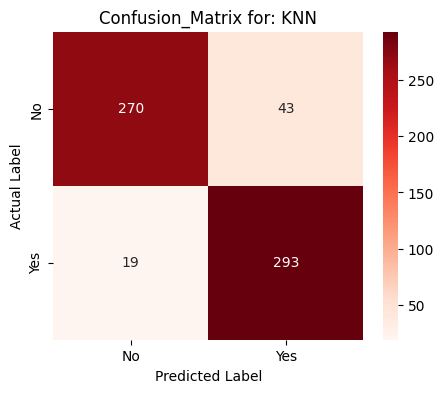

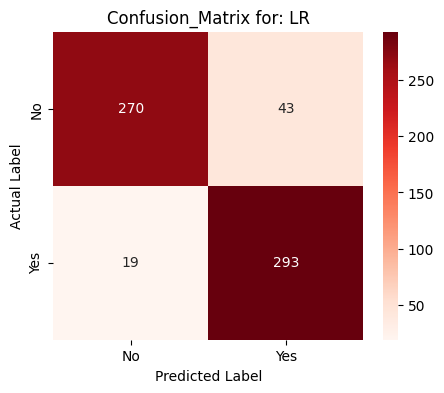

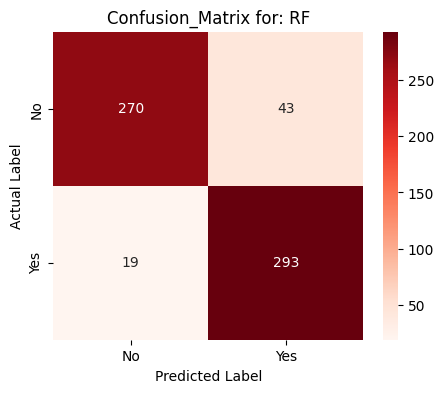

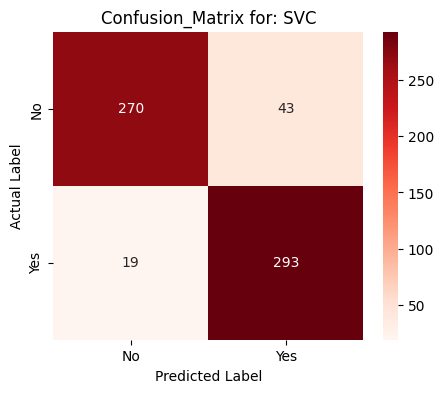

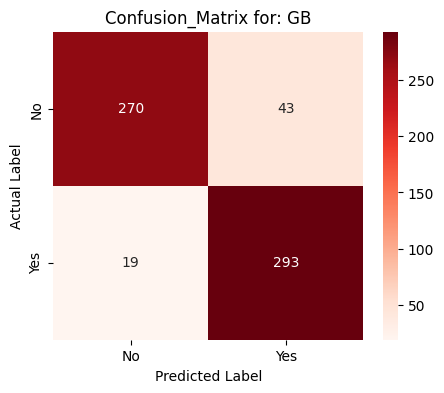

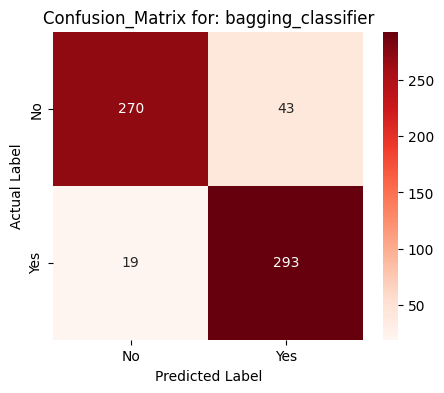

In [82]:
# Create a visualization of confusion matrix

def confusion_matrix_display(confusion_matrix, model):
    plt.figure(figsize = (5, 4))
    sns.heatmap(
        Confusion_Matrix,
        annot = True,
        cmap = "Reds",
        fmt = 'd',
        xticklabels = ["No", "Yes"],
        yticklabels = ["No", "Yes"]
    )
    plt.title(f"Confusion_Matrix for: {model}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    
for model in model_eval.keys():
    confusion_matrix = model_eval[model]["confusion_matrix"]
    confusion_matrix_display(confusion_matrix, model)

**Classification Report for models**

In [83]:
# Display the classification report
from sklearn.metrics import classification_report

for model_name, model_classifier in models.items():
    
    print(f"Classification Report for {model_name}")
    print(classification_report(y_val, y_pred, target_names = ["No", "Yes"]))
    print("=="*30 + "\n")

Classification Report for KNN
              precision    recall  f1-score   support

          No       0.93      0.86      0.90       313
         Yes       0.87      0.94      0.90       312

    accuracy                           0.90       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625


Classification Report for LR
              precision    recall  f1-score   support

          No       0.93      0.86      0.90       313
         Yes       0.87      0.94      0.90       312

    accuracy                           0.90       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625


Classification Report for RF
              precision    recall  f1-score   support

          No       0.93      0.86      0.90       313
         Yes       0.87      0.94      0.90       312

    accuracy                           0.90       625
   macro avg       0.90      0.90     

**Hyperparameter Tuning**

Hyperparameter Tuning is the process of selecting the best set of parameters for a machine learning model.

Why is it important?

Model Performance: Choosing the right hyperparameters can significantly improve a model's performance and accuracy.
Overfitting and Underfitting: Hyperparameter tuning helps prevent overfitting (when a model is too complex and performs poorly on new data) or underfitting (when a model is too simple and cannot capture the underlying patterns in the data).

In [84]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grids = {
    'RF': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'GB': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'KNN': {
        'n_neighbors': [5, 10, 15, 20],
        'weights': ['uniform', 'distance']
    },
    'LR': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'bagging_classifier': {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 0.7, 1.0]}
}

# Dictionary to store the best models and parameters
best_models = {}

# Loop through each model and perform Grid Search
for model_name, model_classifier in models.items():
    # Create the GridSearchCV object with the hyperparameter grid
    grid_search = GridSearchCV(estimator=model_classifier, 
                               param_grid=param_grids[model_name], 
                               scoring='accuracy', 
                               cv=5, 
                               n_jobs=-1)
    
    # Fit the GridSearchCV on the training data
    grid_search.fit(X_train_processed, y_train)
    
    # Store the best model and its parameters
    best_models[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated score for {model_name}: {grid_search.best_score_}")

# Optional: Convert best_models dictionary to DataFrame for easy viewing
best_models_df = pd.DataFrame(best_models).transpose()
print("\nBest Models Summary:")
print(best_models_df)

Best parameters for KNN: {'n_neighbors': 10, 'weights': 'distance'}
Best cross-validated score for KNN: 0.8243198396793586
Best parameters for LR: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validated score for LR: 0.772298997995992
Best parameters for RF: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated score for RF: 0.8823503006012023
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validated score for SVC: 0.8211246492985971
Best parameters for GB: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best cross-validated score for GB: 0.8763438877755512
Best parameters for bagging_classifier: {'max_samples': 1.0, 'n_estimators': 10}
Best cross-validated score for bagging_classifier: 0.8679446893787575

Best Models Summary:
                                                       best_estimator  \
KNN                 KNeighborsClassifier(n_neighbors=10, weights='...   
LR                  LogisticRe

In [85]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# Create an empty dataframe to store the results
rand_table = pd.DataFrame(columns=["model", "best_params", "best_scores"])

# Initialize an empty dictionary to hold the RandomizedSearchCV results for each model
rand_searches_tuned = {}

# Initialize a dictionary to hold the best model
best_model_rand = {}

# Create a stratified k-fold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over models and apply RandomizedSearchCV for hyperparameter tuning
for model_name, model_classifier in models.items():
    
    # Get the parameter grid for the model
    param_grid = param_grids.get(model_name, {})

    # Set up the RandomizedSearchCV with 5-fold cross-validation
    rand_search_tuned = RandomizedSearchCV(
        model_classifier,
        param_distributions=param_grid,
        n_iter=20,  # Number of parameter settings sampled
        cv=skf,  # Cross-validation strategy
        scoring='f1',  # Metric to optimize
        verbose=0,  # Suppress output during fitting
        n_jobs=-1  # Use all available processors
    )
    
    # Fit RandomizedSearchCV on the training data
    rand_search_tuned.fit(X_train_processed, y_train)
    
    # Store the randomized search object in the dictionary
    rand_searches_tuned[model_name] = rand_search_tuned
    
    # Retrieve the best parameters and best score
    best_params = rand_search_tuned.best_params_
    best_score = rand_search_tuned.best_score_
    
    # Append results to the dataframe
    rand_table.loc[len(rand_table)] = [model_name, best_params, best_score]
    
    # Store the best model in the best_model_rand dictionary
    best_model_rand[model_name] = rand_search_tuned.best_estimator_

# Sort the rand_table by the best score in descending order
rand_table = rand_table.sort_values(by="best_scores", ascending=False).reset_index(drop=True)

# Display the rand_table
print("Best Models with Parameters and Scores:")
print(rand_table)

rand_table

Best Models with Parameters and Scores:
                model                                        best_params  \
0                  RF  {'n_estimators': 200, 'min_samples_split': 2, ...   
1                  GB  {'n_estimators': 200, 'max_depth': 7, 'learnin...   
2  bagging_classifier          {'n_estimators': 100, 'max_samples': 1.0}   
3                 KNN         {'weights': 'distance', 'n_neighbors': 10}   
4                 SVC       {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}   
5                  LR      {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}   

   best_scores  
0     0.886236  
1     0.883353  
2     0.871882  
3     0.843751  
4     0.833576  
5     0.777251  


,model,best_params,best_scores
0,RF,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.886236
1,GB,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.883353
2,bagging_classifier,"{'n_estimators': 100, 'max_samples': 1.0}",0.871882
3,KNN,"{'weights': 'distance', 'n_neighbors': 10}",0.843751
4,SVC,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}",0.833576
5,LR,"{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}",0.777251


In [86]:
# Import the confusion matrix for use so that it can be updated
from sklearn.metrics import confusion_matrix

# Evaluate the best models from RandomizedSearchCV

model_reports_tuned_rand = {}

for model_name, best_classifier in best_model_rand.items():
    
    # Predict on the validation set
    y_pred_tuned_rand = best_classifier.predict(X_val_processed)
    
    # Calculate evaluation metrics
    F1_Score = f1_score(y_val, y_pred_tuned_rand)
    Precision_Score = precision_score(y_val, y_pred_tuned_rand)
    Recall_Score = recall_score(y_val, y_pred_tuned_rand)
    Accuracy_Score = accuracy_score(y_val, y_pred_tuned_rand)
    Confusion_Matrix = confusion_matrix(y_val, y_pred_tuned_rand)
    
    # Store the evaluation score for each model
    model_reports_tuned_rand[model_name] = {
        'f1_score': F1_Score,
        'precision_score': Precision_Score,
        'recall_score': Recall_Score,
        'accuracy_score': Accuracy_Score,
        'confusion_matrix': Confusion_Matrix,
        'predictions': y_pred_tuned_rand
    }

# Convert evaluation reports to DataFrame and sort
eval_report_tuned_rand = pd.DataFrame(model_reports_tuned_rand).transpose()
rand_df = eval_report_tuned_rand.sort_values('f1_score', ascending=False)

rand_df

,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,predictions
GB,0.927581,0.893175,0.964744,0.9248,"[[277, 36], [11, 301]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, ..."
bagging_classifier,0.922137,0.880466,0.967949,0.9184,"[[272, 41], [10, 302]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, ..."
RF,0.914894,0.869942,0.964744,0.9104,"[[268, 45], [11, 301]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, ..."
KNN,0.86533,0.782383,0.967949,0.8496,"[[229, 84], [10, 302]]","[1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, ..."
SVC,0.860987,0.806723,0.923077,0.8512,"[[244, 69], [24, 288]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, ..."
LR,0.791069,0.787302,0.794872,0.7904,"[[246, 67], [64, 248]]","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, ..."


**Model Evaluation**

In [87]:
## Get the copy of the test data frame

test_data = df_test.copy()

In [88]:
# Check the info of the test set

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   int64  
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


In [89]:
##checkinf for missing values

test_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [90]:
# Fill the missing values in the TotalCharges column with the median value
df_test['TotalCharges'].fillna(df_test['TotalCharges'].median(), inplace = True)
df_test.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55


In [91]:
df_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [92]:
# Thorough check the test set

for col in df_test.columns:
    print(f"{col} column is of {df_test[col].dtype} data type")
    
    # Check if applying np.isnan will work
    try:
        np.isnan(df_test[col])
    except TypeError:
        print(f"np.isnan() is not applicable to {col} column")

gender column is of object data type
np.isnan() is not applicable to gender column
SeniorCitizen column is of int64 data type
Partner column is of object data type
np.isnan() is not applicable to Partner column
Dependents column is of object data type
np.isnan() is not applicable to Dependents column
tenure column is of int64 data type
PhoneService column is of object data type
np.isnan() is not applicable to PhoneService column
MultipleLines column is of object data type
np.isnan() is not applicable to MultipleLines column
InternetService column is of object data type
np.isnan() is not applicable to InternetService column
OnlineSecurity column is of object data type
np.isnan() is not applicable to OnlineSecurity column
OnlineBackup column is of object data type
np.isnan() is not applicable to OnlineBackup column
DeviceProtection column is of object data type
np.isnan() is not applicable to DeviceProtection column
TechSupport column is of object data type
np.isnan() is not applicable t

In [93]:
#Check for Data Type Consistency

print(df_test.dtypes)

print(X_train.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
Paymen

In [94]:
print(df_test.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [95]:
# Check the columns in both test set and x_train set

print(f"The columns in df_test dataframe are: {df_test.columns}")
print(f"The columns in X_train dataframe are: {X_train.columns}")

The columns in df_test dataframe are: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
The columns in X_train dataframe are: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [96]:
# Check the columns in both test set and x_train set

print(f"The columns in df_test dataframe are: {df_test.columns}")
print(f"The columns in X_train dataframe are: {X_train.columns}")

The columns in df_test dataframe are: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
The columns in X_train dataframe are: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [97]:
# Drop the 'MultipleServices' column before preprocessing
X_train= X_train.drop(columns=['MultipleServices'], errors='ignore')



In [98]:
# Convert the SeniorCitizen column into categorical
df_test['SeniorCitizen'] = df_test['SeniorCitizen'].apply(lambda x: "Yes" if x == 1 else "No")

# Confirm that the SeniorCitizen column has changed
print(f"The data type of SeniorCitizen column is: {df_test['SeniorCitizen'].dtype}\n")
print(f"The value counts for SeniorCitizen column are: {df_test['SeniorCitizen'].value_counts()}")

The data type of SeniorCitizen column is: object

The value counts for SeniorCitizen column are: SeniorCitizen
No     1677
Yes     323
Name: count, dtype: int64


In [99]:
df_test_processed = preprocessor.transform(df_test)


### Use model on test dataframe

In [100]:
# Create an empty dictionary to store the best estimators
best_estimators = {}

# Create an empty dictionary to store the y tests results
y_test = {}

# Iterate over
for model in ["RF", "GB"]:
    if model in best_model_rand:
        best_estimators[model] = best_model_rand[model]
    else:
        print(f"{model} does not exist")

In [101]:
for model, model in best_estimators.items():
    y_test[model] = model.predict(df_test_processed)

In [102]:
# Print the predictions for each model
for model_name, predictions in y_test.items():
    print(predictions)

[1 0 0 ... 1 1 0]
[1 0 0 ... 1 0 0]


In [103]:
# Import the confusion matrix for use so that it can be updated
from sklearn.metrics import confusion_matrix

# Initialize Results dictionary
result_test = {}

# Loop through rand_searches_tuned items
for model, rand_search_tuned in best_model_rand.items():
    
    # Ensure only bagging and extra trees are processed
    if model not in ["RF", "GB"]:
        continue
    
    # Predict on evaluation data
    y_test_pred = rand_search_tuned.predict(df_test_processed)
    
    # Calculate other metrics
    accuracy = accuracy_score(predictions, y_test_pred)
    f1 = f1_score(predictions, y_test_pred)
    precision = precision_score(predictions, y_test_pred)
    recall = recall_score(predictions, y_test_pred)
    conf_matrix = confusion_matrix(predictions, y_test_pred)
    # y_test_prob = rand_search_tuned(predictions, y_test_pred)
    roc_auc = roc_auc_score(predictions, y_test_pred)
    
    # Store the results in eval_results_tuned dictionary
    result_test[model] = {
        'accuracy' : accuracy,
        'f1' : f1,
        'precision' : precision,
        'recall' : recall,
        'conf_matrix' : conf_matrix,
        # 'y_test_prob' : y_test_prob,
        'roc_auc' : roc_auc
    }   
    
# Convert results into a dataframe
scores_test = pd.DataFrame(result_test).transpose()

# Sort the dataframe by roc_auc column
scores_test_df = scores_test.sort_values(by = "roc_auc", ascending = False)

# Display the sorted evaluation scores
print("Model Scores:")
scores_test_df

Model Scores:


,accuracy,f1,precision,recall,conf_matrix,roc_auc
GB,1.0,1.0,1.0,1.0,"[[1477, 0], [0, 523]]",1.0
RF,0.8655,0.734452,0.759184,0.711281,"[[1359, 118], [151, 372]]",0.815695


### Key Insights and Conclusion

**Key Insights:** 


The analysis identified key factors contributing to customer churn, such as high monthly charges, shorter tenure, and the type of contract (with month-to-month contracts showing a higher likelihood of churn). Additionally, customers who do not utilize bundled services like internet or TV are more prone to churn. These insights can help in targeting specific groups for retention efforts.

**Conclusion:**

The created model helps the telecommunication company to predict churn, which will facilitate its actions to retain customers who can potentially increase the retention rates and, consequently, the overall profit of the business. Since churn is affected by a range of factors, one has to focus on them, for instance, providing customers with an incentive to retain their subscription for a longer period or to take additional unrelated services from the company. 


**Saving the Clean Data:**

In [104]:
# import necessary libraries

import pandas as pd

# saving my clean data frame 'traindata'

traindata.to_csv('traindata.csv', index=False)


In [105]:
# install joblib
!pip install joblib


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import joblib

In [107]:
# save the model
joblib.dump(best_model_rand, 'telco_churn_model.pkl')

['telco_churn_model.pkl']

In [108]:
# save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [109]:
# saving each of the models out of the best

In [110]:
rand_table

,model,best_params,best_scores
0,RF,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.886236
1,GB,"{'n_estimators': 200, 'max_depth': 7, 'learnin...",0.883353
2,bagging_classifier,"{'n_estimators': 100, 'max_samples': 1.0}",0.871882
3,KNN,"{'weights': 'distance', 'n_neighbors': 10}",0.843751
4,SVC,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}",0.833576
5,LR,"{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}",0.777251


In [111]:
# Dictionary to hold the model instances
model_instances = {}
 
# Create and fit each model based on the Best parameters
for index, row in rand_table.iterrows():
    model_name = row['model']
    best_params = row['best_params']
 
    # Remove prefixes from parameter names if they exist
    clean_params = {k.split('__')[-1]: v for k, v in best_params.items()}
 
    # Instantiate the model based on its name
    if model_name == 'RF':
        model = RandomForestClassifier(**clean_params)
    elif model_name == 'GB':
        model = GradientBoostingClassifier(**clean_params)
    elif model_name == 'XB':
        model = XGBClassifier(**clean_params)
    elif model_name == 'SVC':
        model = SVC(**clean_params)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(**clean_params)
    elif model_name == 'LR':
        model = LogisticRegression(**clean_params)
 
    # Store the fitted model in the dictionary
    model_instances[model_name] = model
 
    # Save the model as a pickle file
    joblib.dump(model, f'{model_name}_model.pkl')
 
print("All models saved successfully.")

All models saved successfully.


In [112]:
import joblib

#my pipeline
pipeline =ImbPipeline(steps=[
                ('preprocessor', preprocessor),
                ('smote_sampler', sampler), 
                ('model', classifier)
    
])
        
#save the pipeline
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [113]:
# save the pipeline

joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [114]:
import pickle
from sklearn.pipeline import Pipeline

# Assuming 'pipeline' is your trained pipeline object
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])  # Example structure

# Fit the pipeline with training data (X_train, y_train)
pipeline.fit(X_train, y_train)

with open('premodel.pkl', 'wb') as file:
    pickle.dump(pipeline, file)